# Tutorial
In this tutorial we will walk through and demonstrate the basics of using the module `approximating_maxima` and in particular the methods of `ApproximateMaxima`.  

## Introduction

### Lipschitz Continuity
Suppose $a$ and $b$ are real numbers and $f:[a,b]\to\mathbb{R}$ is a real-valued function defined on the interval $[a,b]$. We say that $f$ is *Lipschitz continuous* if there exists a real number $M$ such that, for all $x_1$ and $x_2$ in the interval $[a,b]$,
$$|f(x_{1})-f(x_{2})|\leq K|x_{1}-x_{2}|.$$
In this case we call $M$ a Lipschitz constraint of the function $f$. 

In [42]:
# All necessary functions can be accessed as methods of the ApproximateMaxima class.
from approximating_maxima import ApproximateMaxima

In [43]:
# First we create an instance of an ApproximateMaxima class object using the desired interval and Lipschitz constraint.
approximation = ApproximateMaxima((0,10),3)

# The parameter sample_function can be set at the time of instantiation or as follows.
approximation.sample_function="x*x*x+x*x"


When setting the sample function (either at the time of instantiation as follows) please *ensure* <em>ensure</em> that:

1. Your input is a string.
2. Your equation has only one variable and it is denoted by `x`.
3. Your equation is formatted Pythonically. i.e. Use <em>`'x*x'`</em> to represent the function $x^2$ rather than using `'x^2'`.

In [44]:
# To add new points to the approximation we call the method add_n_points()
approximation.add_n_points(10,'random')

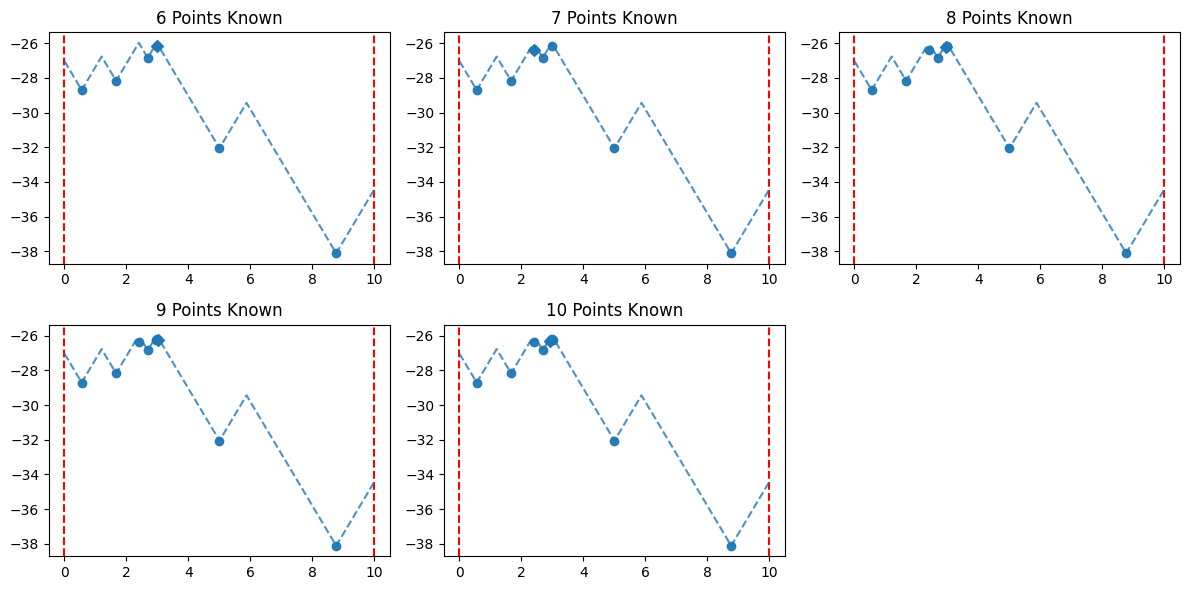

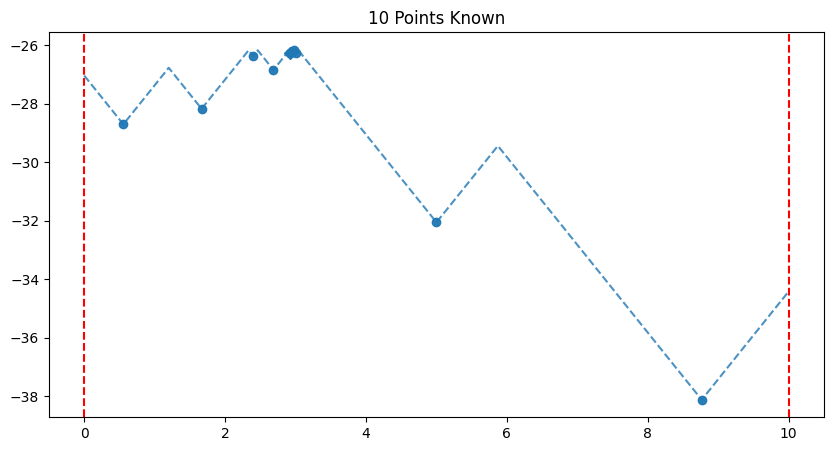

In [45]:
approximation.display_graphs(5)

In [46]:
print(list(zip(approximation.known_x,approximation.known_y)))

[(0.5555555555555556, -28.699113591399147), (1.6666666666666667, -28.16936401744949), (2.3981364259874756, -26.362773192825205), (2.686404698646895, -26.83975955746532), (2.915678305785319, -26.27612053712726), (2.9427914059198397, -26.23327803645361), (2.974672971306314, -26.16624413180591), (3.0065545366927893, -26.248066703697134), (5.0, -32.05093582556812), (8.764619089790958, -38.114530219533556)]


In [47]:
approximation.get_known_pairs()

[(0.5555555555555556, -28.699113591399147),
 (1.6666666666666667, -28.16936401744949),
 (2.3981364259874756, -26.362773192825205),
 (2.686404698646895, -26.83975955746532),
 (2.915678305785319, -26.27612053712726),
 (2.9427914059198397, -26.23327803645361),
 (2.974672971306314, -26.16624413180591),
 (3.0065545366927893, -26.248066703697134),
 (5.0, -32.05093582556812),
 (8.764619089790958, -38.114530219533556)]

In [48]:
approximation.known_y

array([-28.69911359, -28.16936402, -26.36277319, -26.83975956,
       -26.27612054, -26.23327804, -26.16624413, -26.2480667 ,
       -32.05093583, -38.11453022])

In [49]:
approx1=ApproximateMaxima((0,10),3)
approx1.add_n_points(10,'optimal')

In [50]:
approx2=ApproximateMaxima((0,10),3)
approx2.add_n_points(10,'optimal')

In [51]:
approx2.get_known_pairs()

[(0.5555555555555556, -23.903244915423237),
 (1.6666666666666667, -23.903244915423237),
 (2.5, -23.903244915423237),
 (3.3333333333333335, -23.903244915423237),
 (4.166666666666667, -23.903244915423237),
 (5.0, -23.903244915423237),
 (5.833333333333333, -23.903244915423237),
 (6.666666666666667, -23.903244915423237),
 (8.333333333333334, -23.903244915423237),
 (9.444444444444445, -23.903244915423237)]

In [52]:
approx3=ApproximateMaxima((0,10),3,starting_points=[(0.5555555555555556, -17.10732864819269),
 (1.6666666666666667, -17.10732864819269),
 (2.5, -17.10732864819269),
 (3.3333333333333335, -17.10732864819269),
 (4.166666666666667, -17.10732864819269),
 (5.0, -17.10732864819269),
 (5.833333333333333, -17.10732864819269),
 (6.666666666666667, -17.10732864819269),
 (8.333333333333334, -17.10732864819269),
 (9.444444444444445, -17.10732864819269)])

In [53]:
approx1._interval_y

array([-42.29063414, -42.29063414, -42.7073008 , -42.7073008 ,
       -42.7073008 , -42.7073008 , -42.7073008 , -42.7073008 ,
       -41.4573008 , -42.29063414, -42.29063414])

In [54]:
approx3._interval_y

array([-15.44066198, -15.44066198, -15.85732865, -15.85732865,
       -15.85732865, -15.85732865, -15.85732865, -15.85732865,
       -14.60732865, -15.44066198, -15.44066198])

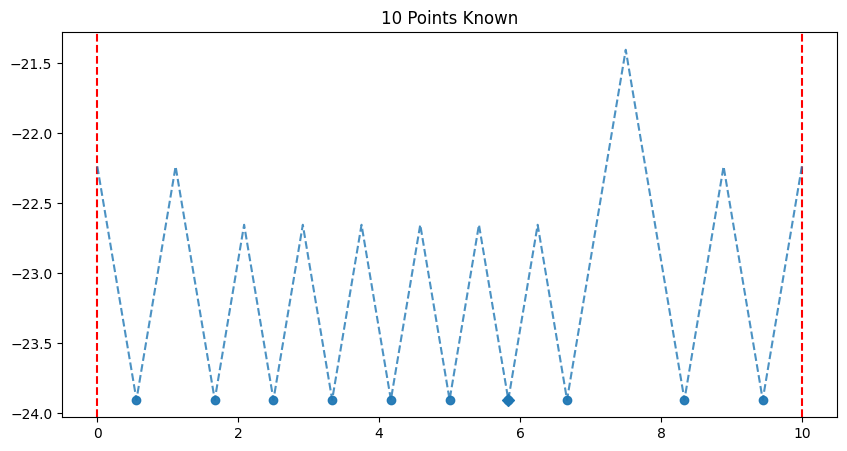

In [55]:
approx2.display_graphs(1)

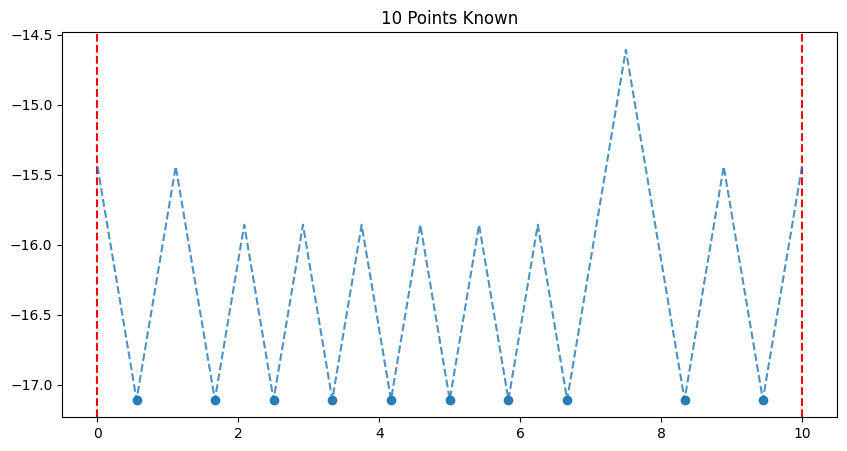

In [56]:
approx3.display_graphs(1)

In [57]:
approx3.known_y==approx2.known_y

array([False, False, False, False, False, False, False, False, False,
       False])

In [58]:
approx2._interval_y==approx3._interval_y

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [59]:
for x in approx2.graphs[1].__dict__.keys():
    print(x)

known_x
known_y
interval_x
interval_y
max_y
max_possible_y
latest_x
latest_y


In [60]:
approx2.known_x

array([0.55555556, 1.66666667, 2.5       , 3.33333333, 4.16666667,
       5.        , 5.83333333, 6.66666667, 8.33333333, 9.44444444])

In [61]:
approx2.__dict__['known_x']=[3,5]

In [62]:
approx2.known_x

[3, 5]

In [63]:
approx2.results_df

,Radius of Information,Least Possible Maximum,Greatest Possible Maximum,Approximated Maximum
Known Points,,,,
1,7.50,-23.903245,-8.903245,-16.403245
2,7.50,-23.903245,-8.903245,-16.403245
3,2.50,-23.903245,-18.903245,-21.403245
4,2.50,-23.903245,-18.903245,-21.403245
5,2.50,-23.903245,-18.903245,-21.403245
6,2.50,-23.903245,-18.903245,-21.403245
7,1.25,-23.903245,-21.403245,-22.653245
8,1.25,-23.903245,-21.403245,-22.653245
9,1.25,-23.903245,-21.403245,-22.653245


In [64]:
approx2.results_df[approx2.results_df.index<5]

,Radius of Information,Least Possible Maximum,Greatest Possible Maximum,Approximated Maximum
Known Points,,,,
1,7.5,-23.903245,-8.903245,-16.403245
2,7.5,-23.903245,-8.903245,-16.403245
3,2.5,-23.903245,-18.903245,-21.403245
4,2.5,-23.903245,-18.903245,-21.403245


In [65]:
nonadapt_approx=ApproximateMaxima((0,11),5)
nonadapt_approx.known_x


array([], dtype=float64)

In [66]:
nonadapt_approx.add_n_points(7,'optimal',adaptive=False)
nonadapt_approx.known_x

array([ 0.78571429,  2.35714286,  3.92857143,  5.5       ,  7.07142857,
        8.64285714, 10.21428571])

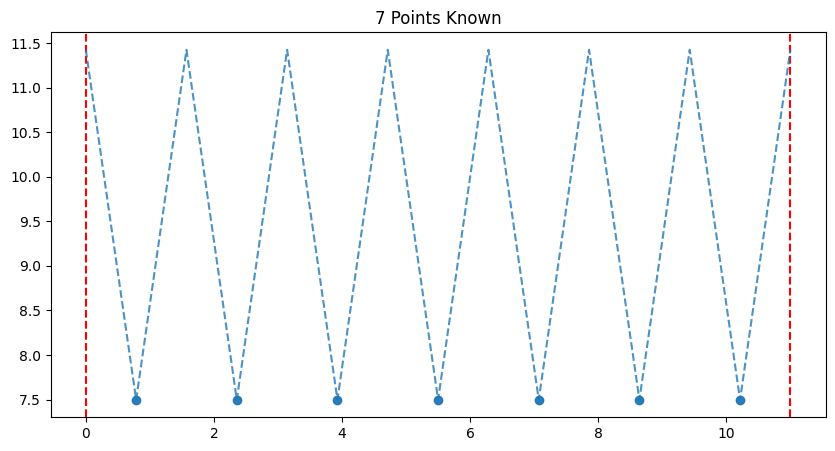

In [67]:
nonadapt_approx.display_graphs()

In [68]:
nonadapt_approx.add_n_points(8,function_type='optimal')

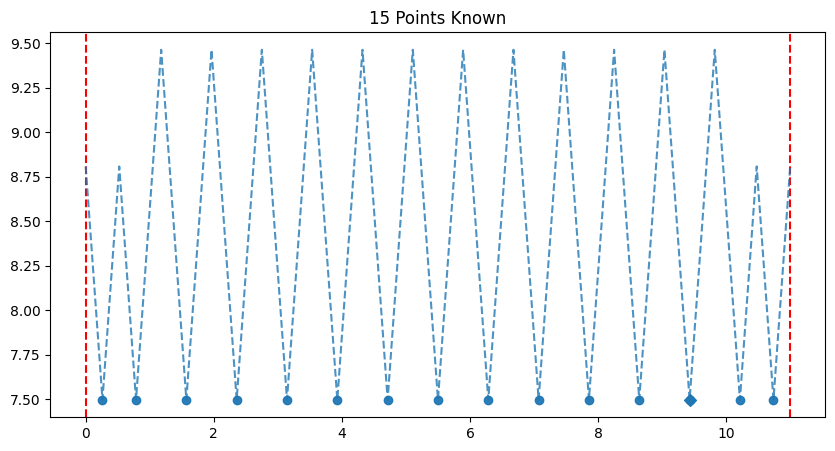

In [69]:
nonadapt_approx.display_graphs(1)

In [70]:
nonadapt_approx.results_df

,Radius of Information,Least Possible Maximum,Greatest Possible Maximum,Approximated Maximum
Known Points,,,,
7,1.964286,7.497726,11.426298,9.462012
8,1.964286,7.497726,11.426298,9.462012
9,1.964286,7.497726,11.426298,9.462012
10,1.964286,7.497726,11.426298,9.462012
11,1.964286,7.497726,11.426298,9.462012
12,1.964286,7.497726,11.426298,9.462012
13,1.964286,7.497726,11.426298,9.462012
14,1.964286,7.497726,11.426298,9.462012
15,0.982143,7.497726,9.462012,8.479869


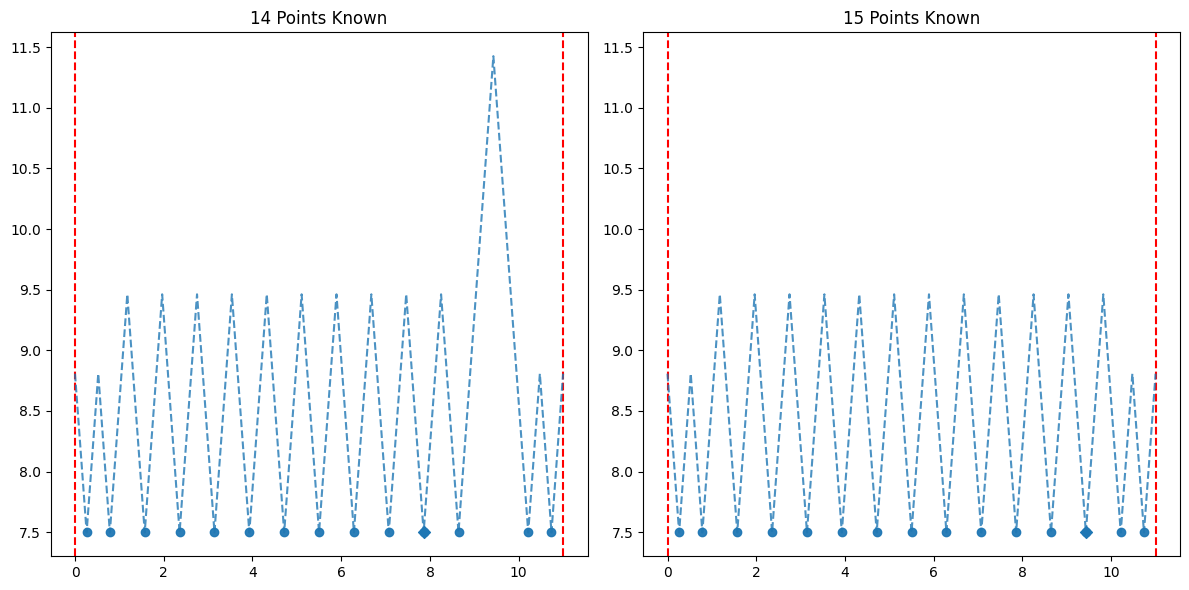

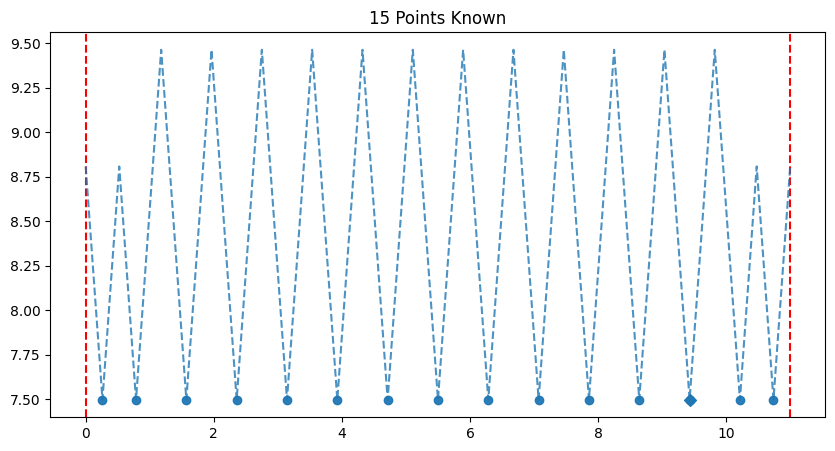

In [71]:
nonadapt_approx.display_graphs(2)

In [72]:
new_approx=ApproximateMaxima((-1,19),3)

In [73]:
new_approx.add_n_points(3,function_type='optimal')

In [74]:
new_approx.add_n_points(8,function_type='random')

In [75]:
new_approx.add_n_points(12,function_type='optimal')

In [76]:
new_approx.results_df

,Radius of Information,Least Possible Maximum,Greatest Possible Maximum,Approximated Maximum
Known Points,,,,
1,15.000000,-8.905401,21.094599,6.094599
2,15.000000,-8.905401,21.094599,6.094599
3,5.000000,-8.905401,1.094599,-3.905401
4,3.653932,-6.213265,1.094599,-2.559333
5,3.653932,-6.213265,1.094599,-2.559333
6,3.653932,-6.213265,1.094599,-2.559333
7,0.468992,-0.781370,0.156615,-0.312378
8,0.199561,-0.242507,0.156615,-0.042946
9,0.063977,-0.099291,0.028662,-0.035315


In [77]:
import pandas as pd
temp_df=pd.DataFrame({'Interval_max':new_approx.known_x})

In [78]:
temp_df

,Interval_max
0,-0.188015
1,2.333333
2,5.666667
3,9.000000
4,11.949465
5,11.954152
6,11.958838
7,12.020672
8,12.082506
9,12.087192


In [87]:
temp_df['xs']=0

In [86]:
temp_df['ys']=new_approx.known_y

In [88]:
temp_df

,Interval_max,xs,ys
0,-0.188015,0,-7.984462
1,2.333333,0,-8.905401
2,5.666667,0,-15.413617
3,9.000000,0,-8.905401
4,11.949465,0,-0.071065
5,11.954152,0,-0.071065
6,11.958838,0,-0.071065
7,12.020672,0,-0.242507
8,12.082506,0,-0.071065
9,12.087192,0,-0.071065


In [93]:
max_index=temp_df['ys'].idxmax()
max_index

4

In [ ]:
temp_df.at[max_index,'Interval_max']


11.949465085491079

In [ ]:
temp_df

,Interval_max,xs,ys
0,-0.188015,0,-7.984462
1,2.333333,0,-8.905401
2,5.666667,0,-15.413617
3,9.000000,0,-8.905401
4,11.949465,0,-0.071065
5,11.954152,0,-0.071065
6,11.958838,0,-0.071065
7,12.020672,0,-0.242507
8,12.082506,0,-0.071065
9,12.087192,0,-0.071065


In [97]:
temp_df.loc[2]=[1,2,3]
temp_df

,Interval_max,xs,ys
0,-0.188015,0,-7.984462
1,2.333333,0,-8.905401
2,1.000000,2,3.000000
3,9.000000,0,-8.905401
4,11.949465,0,-0.071065
5,11.954152,0,-0.071065
6,11.958838,0,-0.071065
7,12.020672,0,-0.242507
8,12.082506,0,-0.071065
9,12.087192,0,-0.071065


In [98]:
for i in temp_df.index:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
